<a href="https://colab.research.google.com/github/weiyunna/PythonDataScience/blob/master/A_tutorial_on_statistical_learning_for_scientific_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A tutorial on statistical-learning for scientific data processing

Statistical learning

Machine learning is a technique with a growing importance, as the size of the datasets experimental sciences are facing is rapidly growing. Problems it tackles range from building a prediction function linking different observations, to classifying observations, or learning the structure in an unlabeled dataset.

This tutorial will explore statistical learning, the use of machine learning techniques with the goal of **statistical inference**: **drawing conclusions on the data at hand.**

Scikit-learn is a Python module integrating classic machine learning algorithms in the tightly-knit world of **scientific Python packages (NumPy, SciPy, matplotlib).**

## Statistical learning: the setting and the estimator object in scikit-learn

### Datasets

Scikit-learn deals with learning information from one or more datasets that are represented as **2D arrays**. They can be understood as a list of multi-dimensional observations. We say that the first axis of these arrays is the **samples** axis, while the second is the **features** axis.

In [0]:
# A simple example shipped with scikit-learn: iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape
# It is made of 150 observations of irises, 
# each described by 4 features: their sepal and petal length and width, as detailed in iris.DESCR.

(150, 4)

When the data is not initially in the (n_samples, n_features) shape, it needs to be **preprocessed** in order to be used by scikit-learn.

In [0]:
#An example of reshaping data would be the digits dataset
#The digits dataset is made of 1797 8x8 images of hand-written digits
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

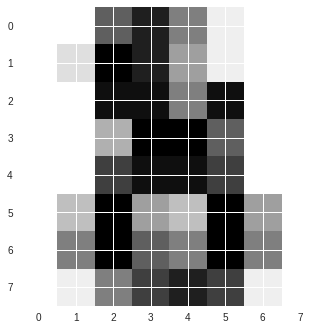

In [0]:
import matplotlib.pyplot as plt 
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

To use this dataset with scikit-learn, we transform each 8x8 image into a feature vector of length 64

In [0]:
data = digits.images.reshape((digits.images.shape[0], -1))

## Estimator Objects

* **Fitting data**: the main API implemented by scikit-learn is that of the estimator. An estimator is **any object that learns from data**; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a `fit` method that takes a dataset (usually a 2-d array):

In [0]:
estimator.fit(data)

* **Estimator parameters**: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

In [0]:
estimator = Estimator(param1=1, param2=2)
estimator.param1

* **Estimated parameters**: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [0]:
estimator.estimated_param_

## Supervised learning: predicting an output variable from high-dimensional observations

**The problem solved in supervised learning**

Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.

**Vocabulary: classification and regression**

If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a **classification** task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a **regression** task.

When doing classification in scikit-learn, y is a vector of integers or strings.

Note: See the Introduction to machine learning with scikit-learn Tutorial for a quick run-through on the basic machine learning vocabulary used within scikit-learn.

### Nearest neighbor and the curse of dimensionality

####Classifying irises: 

The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width:

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)


array([0, 1, 2])